In [1]:
!pip install slideio

In [2]:
import slideio
import tifffile as tiff
#from patchify import patchify
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
import matplotlib.image as mpimg

In [3]:
slide = slideio.open_slide("./Normal_Lymphnode.svs", 'SVS')
num_scenes = slide.num_scenes
for index in range(0, num_scenes):
    print(slide.get_scene(index).name)
print(num_scenes)

Image
1


In [4]:
num_scenes = slide.num_scenes
scene = slide.get_scene(0)

scene.rect

(0, 0, 35817, 38693)

1 Image (0, 0, 35817, 38693) 3


(540, 500, 3)

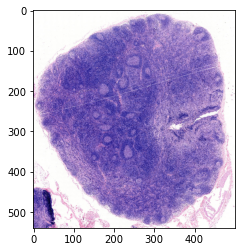

In [5]:
print(num_scenes, scene.name, scene.rect, scene.num_channels)


slide = slideio.open_slide("./Normal_Lymphnode.svs", "SVS")
raw_string = slide.raw_metadata
raw_string.split("|")


image = scene.read_block(size=(500, 0))
plt.imshow(image)
image.shape

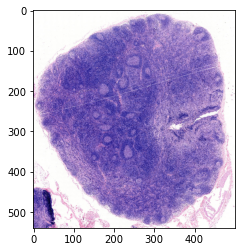

In [6]:
image1 = scene.read_block(size=(500,0))
plt.imshow(image)
im = Image.fromarray(image1)
im.save("your_file.jpeg")

In [7]:
width = scene.rect[2]
height = scene.rect[3]

width = math.floor(width / 2500) * 2500
height = math.floor(height / 2500) * 2500


for i in range(0,height-2500, 2500):
    for j in range(0, width-2500, 2500):
        image1 = scene.read_block((i, j, 2500, 2500), size = (500, 0))
        im = Image.fromarray(image1)
        im.save(f"./images/{i}_{j}.jpeg")
        

In [8]:
for i in range(0,height, 2500):
    for j in range(0, width, 2500):
        import os
        s = os.path.getsize(f"./images/{i}_{j}.jpeg")
        print(s)
        break
    break

5131


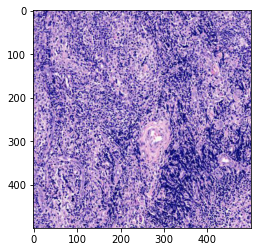

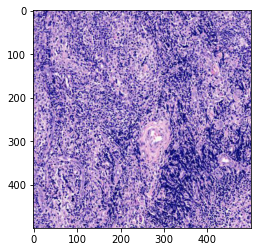

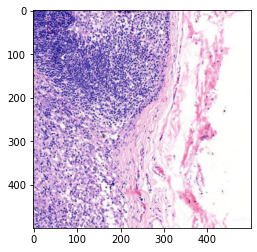

In [9]:
sample_patches=["./images/22500_17500.jpeg","./images/22500_17500.jpeg","./images/32500_22500.jpeg"]

for i in range(len(sample_patches)):
    img = mpimg.imread(sample_patches[i])
    imgplot = plt.imshow(img)
    plt.show()